# Julia Basic Language Demo

In [22]:
using Random
using Plots
using LaTeXStrings
using Printf

In [23]:
# define a variable 
r = 10
b = π

π = 3.1415926535897...

In [24]:
# define a vector
A = [1 2 3]

1×3 Matrix{Int64}:
 1  2  3

In [25]:
A = [1;2;3]

3-element Vector{Int64}:
 1
 2
 3

In [26]:
A = [[1 2 3];[4 5 6]]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

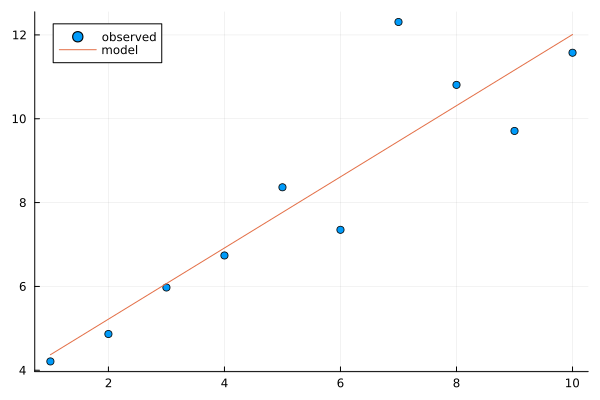

In [27]:
# some linear algebra
x = [ones(10) range(1,10)]
y = x[:,2] .+ randn(10) .+ 2
scatter(x[:,2],y, label="observed")

# matrix division by polynomial fitting
b = x \ y
linmod_y = [b'*[1;1]; b'*[1;10]]
plot!([1;10], linmod_y, label="model")

## Monte Carlo Simulation to Calculate $\pi$

In [28]:
# define a Julia function for the approximation
function monte_carlo_pi(n_sim_points::Int64)
    p_outside = Tuple{Float64, Float64}[]
    p_inside = Tuple{Float64, Float64}[]
    for i in 0:n_sim_points
        # create two random numbers for x, y
        x = rand() - 0.5
        y = rand() - 0.5
        # if the norm is less then the radius, add to point n_outside
        if sqrt(x^2 + y^2) > 0.5
            push!(p_outside, (x,y))
        else
            push!(p_inside, (x,y))
        end
    end
    return (p_outside, p_inside)
end

monte_carlo_pi (generic function with 1 method)

In [20]:
n_t = 20_000
p_outside, p_inside = monte_carlo_pi(n_t)
x_outside = [k[1] for k in p_outside]
y_outside = [k[2] for k in p_outside]
x_inside = [k[1] for k in p_inside]
y_inside = [k[2] for k in p_inside]

approx_π = 4 * length(p_inside)/n_t 
@printf "π ≈ %f" approx_π

π ≈ 3.131800

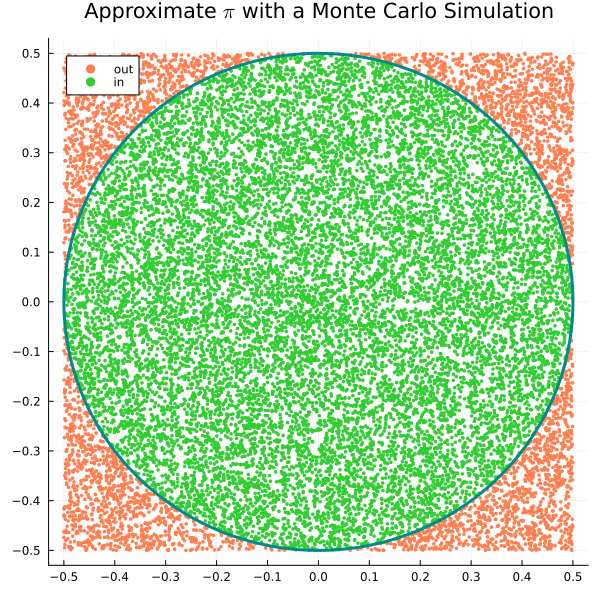

In [22]:
scatter(x_outside, y_outside, 
    mc=:coral, title=L"Approximate $\pi$ with a Monte Carlo Simulation",
    label="out", size=(600,600), xticks=-0.5:0.1:0.5, yticks=-0.5:0.1:0.5,
    markerstrokecolor=:coral, markersize=2)
scatter!(x_inside, y_inside, mc=:coral, markers=:limegreen, markerstrokecolor=:limegreen, markersize=2 ,label="in")
xs = range(0,2*pi,length=10000)

# add an ideal circle
circle_x = 0.5*cos.(xs)
circle_y = 0.5*sin.(xs)
plot!(circle_x, circle_y,linewidth=3,color=:darkcyan, label="")